In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
medicine_stat = pd.read_csv('DS_Practice/train_data_tree.csv')
medicine_stat

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [5]:
X_train = medicine_stat.drop(['num'], axis=1)
X_test = medicine_stat.drop(['num'], axis=1)
y_train = medicine_stat.num
y_test = medicine_stat.num

In [6]:
y_train

0      1
1      1
2      1
3      0
4      1
      ..
233    0
234    0
235    1
236    1
237    0
Name: num, Length: 238, dtype: int64

In [9]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(167.4, 181.2, 'X[1] <= 0.5\ngini = 0.497\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'X[0] <= 0.5\ngini = 0.434\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'gini = 0.256\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.482\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.5\ngini = 0.384\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'gini = 0.355\nsamples = 65\nvalue = [15, 50]')]

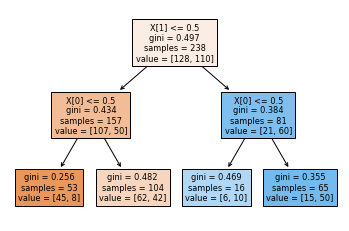

In [10]:
tree.plot_tree(clf, filled=True)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
clf_rf = RandomForestClassifier(n_estimators=15,max_depth=5)

In [9]:
parameters ={'n_estimators':[10,20,30],'max_depth':[2,5,7,10]}
gscv_clf = GridSearchCV(clf_rf, parameters, cv = 5)
gscv_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=5, n_estimators=15),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [10]:
best_clf = gscv_clf.best_clf
best_clf.score(X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_clf'

In [ ]:
feature_importances = best_clf.feature_importances_

In [ ]:
df = pd.DataFrame({'features': list(X_train),'feature_importances':feature_importances })

In [ ]:
sick_people = pd.read_csv('DS_Practice/heart.csv')
X_train = sick_people.drop(['target'], axis = 1)
y_train = sick_people.target
X_test= sick_people.drop(['target'], axis = 1)
y_test = sick_people.target

In [55]:
np.random.seed(0)
rf_clf = RandomForestClassifier(10, max_depth=5)
rf_clf.fit(X_train, y_train)
feature_importances = rf_clf.feature_importances_

array([0.08410644, 0.11456376, 0.18401696, 0.38901048, 0.00064578,
       0.22765659])

In [ ]:
# imp = pd.DataFrame(rf_clf.feature_importances_, index=X_train.columns, columns=['importance'])
# imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [12]:
mush = pd.read_csv('DS_Practice/training_mush.csv')

X_train = mush.drop(['class'], axis=1)
y_train = mush['class']
# y_train
parameters ={'n_estimators': range(10,50, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7),
            'min_samples_split': range(2, 9, 2)}

clf_rf = RandomForestClassifier(random_state=0)
gscv_clf = GridSearchCV(clf_rf, parameters, cv = 3, n_jobs=-1)
gscv_clf.fit(X_train, y_train)
best_clf = gscv_clf.best_params_

mush_test = pd.read_csv('DS_Practice/testing_mush.csv')
pred = gscv_clf.predict(mush_test)


array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [13]:
pd.Series(pred).value_counts()

0    1055
1     976
dtype: int64

In [16]:
y_true = pd.read_csv('DS_Practice/testing_y_mush.csv')

<AxesSubplot:>

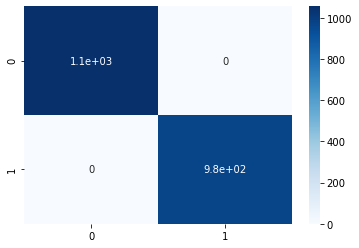

In [19]:
conf_matrix = confusion_matrix(y_true, pred)
#sns.heatmap(conf_matrix, annot=True, cmap="Blues")

In [24]:
invasion = pd.read_csv('DS_Practice/invasion.csv')
operative_info = pd.read_csv('DS_Practice/operative_information.csv')
invasion.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [57]:
X_train = invasion.drop(['class'], axis = 1)
y_train = invasion['class'].replace({'fighter': 1, 'cruiser': 0, 'transport': 2} )

In [66]:

#feature_importances = gscv_clf.feature_importances_

In [74]:
zones = pd.read_csv('DS_Practice/space_can_be_a_dangerous_place.csv')

X_train = zones.drop(['dangerous'], axis=1)
y_train = zones['dangerous']
X_test = zones.drop(['dangerous'], axis=1)

0        1
1        1
2        1
3        1
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: dangerous, Length: 100000, dtype: int64

In [89]:
clf_rf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': [30], 'max_depth': [7]} 
gscv_clf = GridSearchCV(clf_rf, parameters, cv = 3, n_jobs=-1)
gscv_clf.fit(X_train, y_train)
feature_importances = gscv_clf.best_estimator_.feature_importances_
feature_importances

array([0.00769108, 0.00817914, 0.0075117 , 0.00939999, 0.01550483,
       0.50532501, 0.44638826])

<AxesSubplot:>

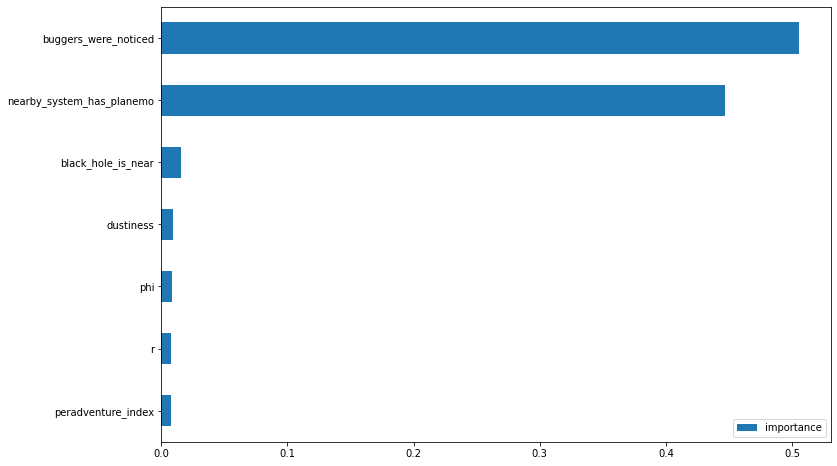

In [91]:
imp = pd.DataFrame(feature_importances, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))